In [199]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [201]:
# Cargar el dataset
data = pd.read_csv("D:/Universidad/ANALISIS DE DATOS/CAR DETAILS FROM CAR DEKHO.csv")


In [203]:
# Mostrar las primeras filas del dataset
print(data.head())
print(data.columns)

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')


In [205]:
data.shape

(4340, 8)

In [174]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [176]:
# Manejo de valores faltantes

data = data.dropna() # Eliminamos filas con valores faltantes 

caracteristicas = ["km_driven", "year", "fuel", "name"] # Seleccionamos las variables más relevantes
objetivo = "selling_price"

# Verificar si las columnas seleccionadas están presentes en el dataset
data = data[caracteristicas + ["selling_price"]]

# Convertir variables categóricas en variables dummy
data = pd.get_dummies(data, columns=["fuel", "name"], drop_first=True) #drop_first = True (elimina una categoría para evitar multicolinealidad.

# Mostrar el dataset preprocesado
print(data.head())

   km_driven  year  selling_price  fuel_Diesel  fuel_Electric  fuel_LPG  \
0      70000  2007          60000        False          False     False   
1      50000  2007         135000        False          False     False   
2     100000  2012         600000         True          False     False   
3      46000  2017         250000        False          False     False   
4     141000  2014         450000         True          False     False   

   fuel_Petrol  name_Ambassador Classic 2000 Dsz  \
0         True                             False   
1         True                             False   
2        False                             False   
3         True                             False   
4        False                             False   

   name_Ambassador Grand 1800 ISZ MPFI PW CL  name_Audi A4 1.8 TFSI  ...  \
0                                      False                  False  ...   
1                                      False                  False  ...   
2       

In [178]:
# Dividimos el dataset en conjunto de entrenamiento y prueba
X = data.drop("selling_price", axis=1)  # Características
y = data["selling_price"]  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [180]:
# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [181]:
# Realizar predicciones
y_pred = model.predict(X_test)

In [182]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

Error cuadrático medio (MSE): 80363974624.09357
Coeficiente de determinación (R²): 0.6083104421827032


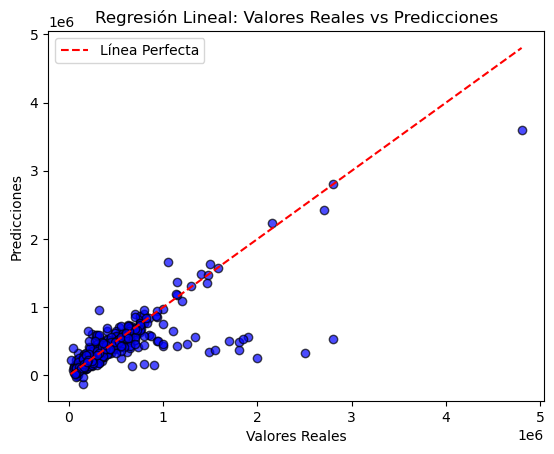

In [214]:
# Visualizar resultados con la línea perfecta
plt.scatter(y_test, y_pred, color = "blue", edgecolor = "k", alpha =0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea Perfecta')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Valores Reales vs Predicciones")
plt.legend()
plt.show()


En la siguiente gráfica podemos observar en el eje X los precios reales de los automóviles y, en el eje Y las predicciones 
hechas por nuestro modelo. Con un 60.83% de predicción.
La línea roja es una referencia ideal donde los valores reales son similares al de las predicciones, 
y los puntos azules indican la comparación entre un valor real y su predicción correspondiente.
Si el punto se encuentra más cerca de la línea roja, indica una predicción más precisa. 